In [29]:
import sys
import random
import numpy
import copy
import matplotlib.pyplot as plt
import re
%matplotlib inline 

In [9]:
file = open('noisydata.gdat')
lst = []
for line in file:
    lst += [line.split()]
time = [x[0] for x in lst]
el = [x[1] for x in lst]

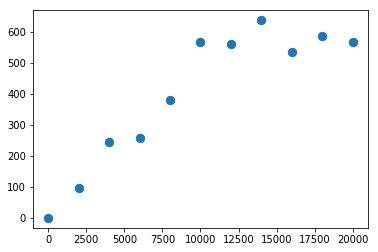

In [16]:
#plotting our experimental data
plt.figure
plt.scatter(time[1:],el[1:],s=70)

In [21]:
#Read all the simulation results
relpath = '../parameter_estimation_results/abc/thresh1/'
base_filename = 'step_'
npts = 10000
results = [[] for i in range(0,npts)]
for i in range(0,npts):
    file = open(relpath+base_filename+str(i)+'.gdat')
    for line in file:
        results[i] += [line.split()]

[['0.000000000000e+00', '0.000000000000e+00'], ['2.000000000000e+03', '2.504969322305e+01'], ['4.000000000000e+03', '4.905714107541e+01'], ['6.000000000000e+03', '7.206569826991e+01'], ['8.000000000000e+03', '9.411691871102e+01'], ['1.000000000000e+04', '1.152506327743e+02'], ['1.200000000000e+04', '1.355050110086e+02'], ['1.400000000000e+04', '1.549166331851e+02'], ['1.600000000000e+04', '1.735205599242e+02'], ['1.800000000000e+04', '1.913503949419e+02'], ['2.000000000000e+04', '2.084383434227e+02']]


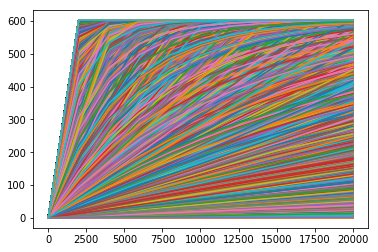

In [26]:
#Plotting all the simulation results
plt.figure
for i in range(0,npts):
    sim_results = [x[1] for x in results[i]]
    plt.plot(time[1:],sim_results[1:])
    plt.hold

In [43]:
#Read indices of accepted parameter sets
file = open(relpath+'abc_accepted_parameter_indices.txt');
ai = []
for line in file:
    ai += [re.split(':|\t',line)]
indices = ai[2][1:-1]

['1065', '1124', '1636', '2704', '3094', '3171', '3423', '3504', '3684', '3837', '3989', '4311', '4388', '4894', '5173', '5180', '5315', '5996', '6577', '6823', '7120', '7174', '7181', '7254', '7261', '7439', '7571', '7897', '7984', '8293', '8321', '8528', '8596', '8599', '9062', '9504', '9585', '9634', '9657']


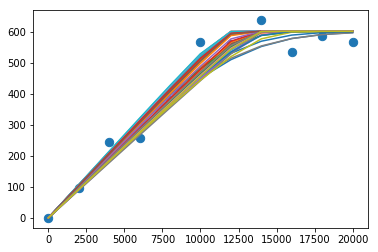

In [46]:
#Plotting the accepted simulation results
plt.figure
plt.scatter(time[1:],el[1:],s=70)
for i in indices:
    sim_results = [x[1] for x in results[int(i)]]
    plt.plot(time[1:],sim_results[1:])
    plt.hold

In [101]:
# read sampled parameter values
relpath = '../parameter_estimation_results/abc/thresh1/'
base_filename = 'step_'
npts = 10000
km1_results = [[] for i in range(0,npts)]
k2_results = [[] for i in range(0,npts)]
print(len(indices))
km1_posterior_results = [[] for i in range(0,len(indices))]
k2_posterior_results = [[] for i in range(0,len(indices))]
counter = 0;
int_indices = [int(x) for x in indices]
print(len(int_indices))
for i in range(0,npts):
    file = open(relpath+base_filename+str(i)+'.net')
    flag = 0;
    counter_flag = 0;
    for line in file:
        if 'begin parameters' in line:
            flag = 1;
        if 'end parameters' in line:
            flag = 0;
        if 'km1' in line and flag == 1 and "rateLaw" not in line:
            line_elements = line.split();
            km1_results[i] = float(line_elements[2]);
            if i in int_indices:
                km1_posterior_results[counter] = km1_results[i]
                counter_flag = 1;
        if 'k2' in line and flag == 1 and "rateLaw" not in line:
            line_elements = line.split();
            k2_results[i] = float(line_elements[2]);
            if i in int_indices:
                k2_posterior_results[counter] = k2_results[i]    
    if counter_flag==1:
        counter = counter + 1;
print(k2_posterior_results)
print(km1_posterior_results)

39
39
[-1.97585451899482, -2.06142848199722, -2.04990300406696, -2.05723592167704, -2.09260484768382, -2.10303055926342, -2.11604972449319, -1.94538136297513, -2.04778425379534, -2.11622335143897, -2.05160711464838, -2.04476168837626, -2.10381914442184, -2.05577976641113, -2.05277651724952, -2.09927153662665, -2.10591079323503, -2.05608928297938, -2.06981737198515, -2.05209635801051, -1.97492810115126, -2.09386708701917, -2.02609397820378, -2.09156456522013, -2.12119970048729, -2.06600451355708, -2.04688371554735, -2.12737449518482, -2.09268554035578, -2.04262863529276, -2.08639980997685, -2.07426840334609, -2.10452948695622, -2.05422586452695, -2.07892482170568, -2.06307047623898, -2.10745246558457, -2.09383924758558, -2.11101445244122]
[-0.679323725696506, -3.50100685620873, -4.15224401317118, -4.84315132566195, -3.17849451324136, -2.18244259360439, -3.63447155554418, -0.609554171316233, -3.66874548745272, -4.5597468378454, -2.41046848451695, -1.33494974769071, -4.86870510299013, -4.

In [82]:
print(indices)

['1065', '1124', '1636', '2704', '3094', '3171', '3423', '3504', '3684', '3837', '3989', '4311', '4388', '4894', '5173', '5180', '5315', '5996', '6577', '6823', '7120', '7174', '7181', '7254', '7261', '7439', '7571', '7897', '7984', '8293', '8321', '8528', '8596', '8599', '9062', '9504', '9585', '9634', '9657']


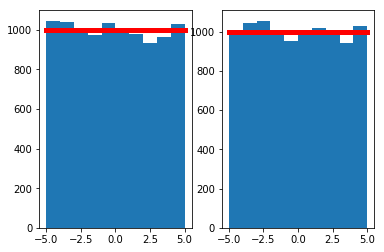

In [103]:
#Plotting the parameter prior distributions

plt.subplot(1,2,1)
x = [i for i in range(-5,6)]
y = [npts/10 for i in range(-5,6)];
plt.hist(numpy.array(km1_results))
plt.hold
plt.plot(x,y,'r',linewidth=5)

plt.subplot(1,2,2)
x = [i for i in range(-5,6)]
y = [npts/10 for i in range(-5,6)];
plt.hist(numpy.array(k2_results))
plt.hold
plt.plot(x,y,'r',linewidth=5)


<function matplotlib.pyplot.hold>

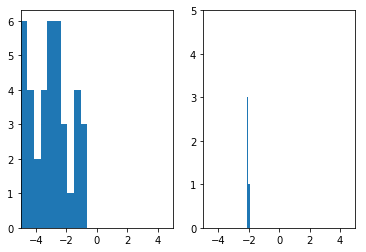

In [110]:
#Plotting the parameter prior distributions
ax1 = plt.subplot(1,2,1)
x = [i for i in range(-5,6)]
y = [npts/10 for i in range(-5,6)];
plt.hist(numpy.array(km1_posterior_results))
plt.hold
ax1.set_xlim([-5,5])
#plt.plot(x,y,'r',linewidth=5)

ax2 = plt.subplot(1,2,2)
x = [i for i in range(-5,6)]
y = [npts/10 for i in range(-5,6)];
plt.hist(numpy.array(k2_posterior_results))
ax2.set_xlim([-5, 5])
ax2.set_ylim([0,5])
plt.hold
#plt.plot(x,y,'r',linewidth=5)